In [17]:
import implied_volatility_surface as IVS
import numpy as np

In [96]:
#Get infos
AAPL_Infos = IVS.Infos('AAPL').Data
#List of info-keys: 
AAPL_Infos.keys()

dict_keys(['address1', 'city', 'state', 'zip', 'country', 'phone', 'website', 'industry', 'industryKey', 'industryDisp', 'sector', 'sectorKey', 'sectorDisp', 'longBusinessSummary', 'fullTimeEmployees', 'companyOfficers', 'auditRisk', 'boardRisk', 'compensationRisk', 'shareHolderRightsRisk', 'overallRisk', 'governanceEpochDate', 'compensationAsOfEpochDate', 'irWebsite', 'maxAge', 'priceHint', 'previousClose', 'open', 'dayLow', 'dayHigh', 'regularMarketPreviousClose', 'regularMarketOpen', 'regularMarketDayLow', 'regularMarketDayHigh', 'dividendRate', 'dividendYield', 'exDividendDate', 'payoutRatio', 'fiveYearAvgDividendYield', 'beta', 'trailingPE', 'forwardPE', 'volume', 'regularMarketVolume', 'averageVolume', 'averageVolume10days', 'averageDailyVolume10Day', 'bid', 'ask', 'bidSize', 'askSize', 'marketCap', 'fiftyTwoWeekLow', 'fiftyTwoWeekHigh', 'priceToSalesTrailing12Months', 'fiftyDayAverage', 'twoHundredDayAverage', 'trailingAnnualDividendRate', 'trailingAnnualDividendYield', 'currenc

In [97]:
#Get list of options dicts for a specified ticker: 
TSLA_Options = IVS.Options('TSLA').Data 

In [98]:
TSLA_Options[500]

{'contractSymbol': 'TSLA250110C00740000',
 'lastTradeDate': Timestamp('2025-01-02 15:11:50+0000', tz='UTC'),
 'strike': 740.0,
 'lastPrice': 0.02,
 'bid': 0.0,
 'ask': 0.02,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 1.0,
 'openInterest': 1847,
 'impliedVolatility': 1.2343788281249999,
 'inTheMoney': False,
 'contractSize': 'REGULAR',
 'currency': 'USD',
 'expiry_date': Timestamp('2025-01-10 00:00:00+0000', tz='UTC'),
 'flag': 'c',
 'days_since_last_trade': 0,
 'S': 383.81,
 'q': 0,
 'r': np.float64(0.04390999794006348),
 't_days': 7,
 't_years': 0.019178082191780823,
 'IV': np.float64(1.4788128540242953)}

In [78]:
#Building a filtered DataFrame for NVDA options with strike ranging from *.75 to *1.25:

NVDA_price = IVS.Infos('NVDA').Data['currentPrice']
NVDA_Min_Strike, NVDA_Max_Strike = .75 * NVDA_price , 1.25 * NVDA_price

print(
    f"75% NVDA Stock Price:                    {NVDA_Min_Strike:<20}\n"
    f"100% NVDA Stock Price:                   {NVDA_price:<20}\n"
    f"125% NVDA Stock Price:                   {NVDA_Max_Strike:<20}")

75% NVDA Stock Price:                    103.01939999999999  
100% NVDA Stock Price:                   137.3592            
125% NVDA Stock Price:                   171.69899999999998  


In [79]:
NVDA_IV = IVS.Options('NVDA').IV( 
    NVDA_Min_Strike,                            #75% NVDA Stock Price.
    NVDA_Max_Strike,                            #125% NVDA Stock Price.
    max_days_since_last_trade=5,                #No options with more than 5 days since last trade.
    min_t_days=1,                               #No options expiring in less than 1 day.
    min_iv=0.01,                                #No options with an Implied Volatility < .01
    max_iv=2,                                   #No options with an Implied Volatility > 2
    min_last_price=0.5 )                        #No options with a Last Price < .5

In [80]:
#Verifying if data is correctly filtered:

k_max=max(NVDA_IV.df['K'])
k_min=min(NVDA_IV.df['K'])
dslt_max=max(NVDA_IV.df['days_since_last_trade'])
due_min=min(NVDA_IV.df['t_days'])
iv_min=min(NVDA_IV.df['IV'])
iv_max=max(NVDA_IV.df['IV'])

print(
    f"DataFrame Max Strike Value:             {k_max:<20}\n"
    f"DataFrame Min Strike Value:             {k_min:<20}\n"
    f"DataFrame Max Days Since Last Trade:    {dslt_max:<20}\n"
    f"DataFrame Min Days Until Expiry:        {due_min:<20}\n"
    f"DataFrame Min Implied Volatility:       {iv_min:<20}\n"
    f"DataFrame Max Implied Volatility:       {iv_max:<20}")

DataFrame Max Strike Value:             171.0               
DataFrame Min Strike Value:             104.0               
DataFrame Max Days Since Last Trade:    3                   
DataFrame Min Days Until Expiry:        7                   
DataFrame Min Implied Volatility:       0.1660191767056738  
DataFrame Max Implied Volatility:       1.3734610928576507  


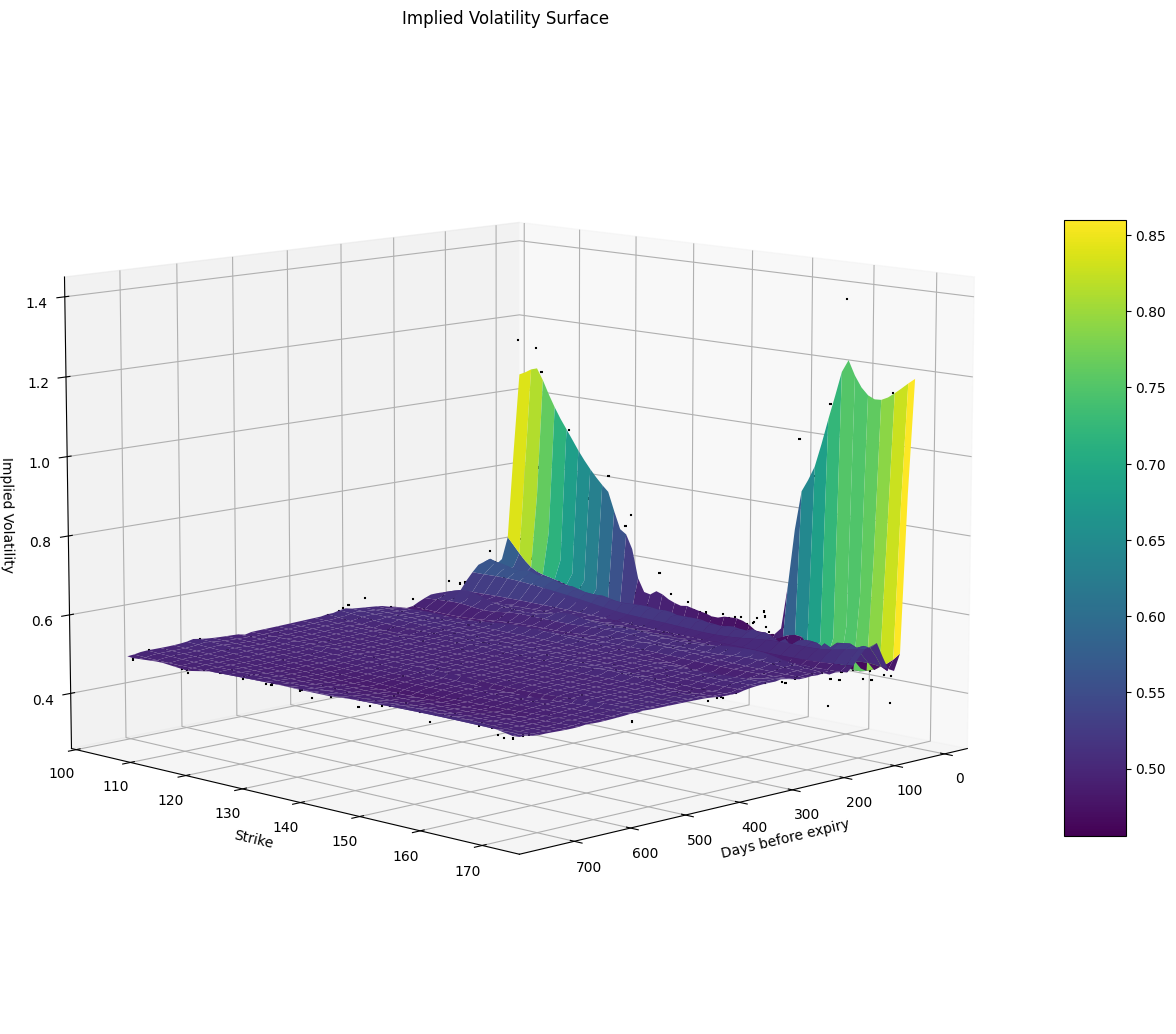

In [101]:
#Plotting the Volatility Surface:
NVDA_IV.Surface(granularity=64,smooth=2.5,function='linear',cmap='viridis',scatter=True,elev=10,azim=45)

In [102]:
#You can launch an Interactive Surface from any IV Object -> Ticker doesn't matter.
NVDA_IV.InteractiveSurface()